<font size=10>**Titanic - Data Exploration** </font>


This kernel is to become familiar with the Kaggle interface and be able to generate and submit the allgender solution.

<font size=6>**Exploring the Data** </font>

Import helpful libraries (https://github.com/kaggle/docker-python)



In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
# %matplotlib inline

from numpy import mean;
from numpy import median;

# Input data files are available in the "../input/" directory.
import os
cwd = os.getcwd()
print(cwd)

print(os.listdir("input"))
print(cwd)
# x = pd.read_csv("input/train.csv")
original_train = pd.read_csv("input/train.csv")
data_train = original_train

original_test = pd.read_csv("input/test.csv")
data_test = original_test



# Any results you write to the current directory are saved as output.
data_train.head()


C:\Users\Mak Hozo\Documents\Data Science\Titanic
['test.csv', 'train.csv']
C:\Users\Mak Hozo\Documents\Data Science\Titanic


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
    data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Create some bar plots to look at some variable descriptive statistics.

In [25]:
# Learning sns.barplot:
# sns.barplot(x="Embarked", y="Survived", hue="Sex", data=data_train);
# sns.set_style("whitegrid")
# sns.barplot(x="Pclass", y = "Survived", data=data_train);
# sns.barplot(x="Survived", y = "Sex", data=data_train, order=["female", "male"]);
# sns.barplot(x="Pclass", y="Survived", data=data_train, estimator=mean, ci=68, capsize=0.2, palette = "Blues_d");
# sns.barplot(x="Survived", y = "Pclass", orient="h", data=data_train);

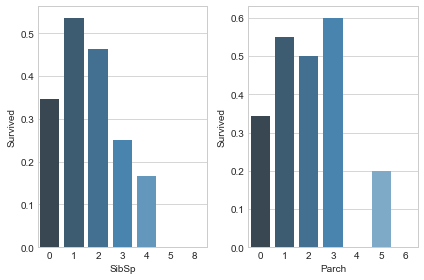

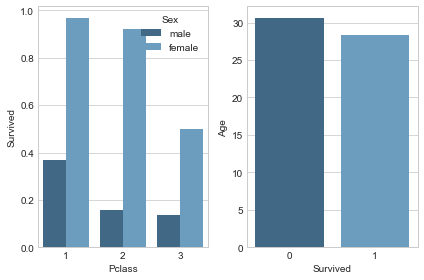

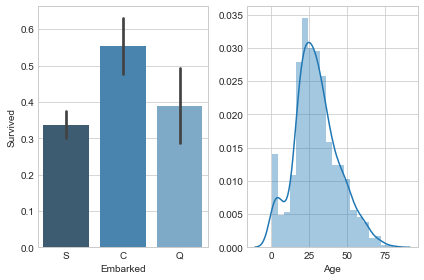

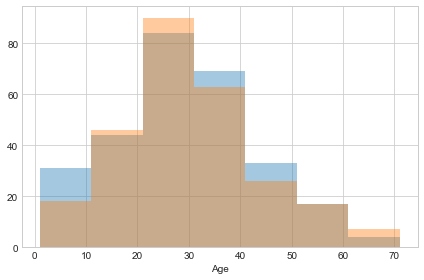

In [26]:
sns.set_style("whitegrid");
fig, ax =plt.subplots(1,2)
sns.barplot(x="SibSp", y="Survived", palette = "Blues_d", ci=None, data=data_train, ax=ax[0]);
sns.barplot(x="Parch", y="Survived", palette = "Blues_d", ci=None, data=data_train, ax=ax[1]);
# fig.show()
fig.tight_layout() 
fig, ax =plt.subplots(1,2)
# sns.barplot(x="Parch", y="Survived", palette = "Blues_d", ci=None, data=data_train);
sns.barplot(x="Pclass",  hue = "Sex", y="Survived", palette = "Blues_d", ci=None, data=data_train, ax=ax[0]);
sns.barplot(x="Survived", y="Age", palette = "Blues_d", orient="v", data=data_train, ci= None, ax=ax[1]);

fig.tight_layout() 
fig, ax =plt.subplots(1,2)
sns.barplot(x="Embarked",  y = "Survived", palette = "Blues_d", data=data_train, ax=ax[0]);
sns.distplot(data_train['Age'].dropna(how='any'),ax=ax[1]);
fig.tight_layout() 

fig, ax = plt.subplots()
for a in [data_train[data_train["Survived"]==1]["Age"].dropna(how='any'),             #yellow
          data_train[data_train["Survived"]==0]["Age"].sample(342).dropna(how='any')]: #blue
    sns.distplot(a, bins=range(1, 81, 10), ax=ax, kde=False)
    
fig.tight_layout() 
# ax.set_xlim([0, 100])
# 342+549 #549 did not survive

Look at some of the unique values in the data

In [27]:

data_train["Parch"].describe()
# print("Unique PClass values",data_train.Pclass.unique())
for column in data_train.drop(["PassengerId", "Name", "Ticket"],axis=1): #axis=1 specifics columns; axis=0 specifies rows
    print("Unique ", column, " values",data_train[column].unique())



Unique  Survived  values [0 1]
Unique  Pclass  values [3 1 2]
Unique  Sex  values ['male' 'female']
Unique  Age  values [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
Unique  SibSp  values [1 0 3 4 2 5 8]
Unique  Parch  values [0 1 2 5 3 4 6]
Unique  Fare  values [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.

In [28]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<font size=6>**Transforming the Data** </font>

First let's modify some of the variables for our needs:
* "Cabin" is all over the place. Let's use only the first character, since it *might* be important.
* We can safely drop Passenger ID as it is highly unlikely it is correlated to any existing variables.
* As interesting as it could be for text analysis, let's drop Name and Ticket too.
* Convert 'Embarked' and 'Cabin' and 'Gender' into dummy variables

In [29]:
#Reload data just in case
data_train = original_train
data_test = original_test



data_train["Cabin"] = data_train["Cabin"].str[0]
data_test["Cabin"] = data_test["Cabin"].str[0]
data_train = data_train.drop(columns=["PassengerId"])
# data_test = data_test.drop(columns=["PassengerId"])
data_train = data_train.drop(columns=["Name", "Ticket"])
data_test = data_test.drop(columns=["Name", "Ticket"])
# funtemp = data_train["Embarked"] == "C"
data_train = pd.get_dummies(data_train, columns=["Embarked", "Cabin", "Sex"], prefix=["embark", "cabin", "g"])
data_test = pd.get_dummies(data_test, columns=["Embarked", "Cabin", "Sex"], prefix=["embark", "cabin", "g"])
data_test["cabin_T"] = 0 #because this variable never appeared in the test set, which removed it from the dummies function
data_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,embark_C,embark_Q,embark_S,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,g_female,g_male,cabin_T
0,892,3,34.5,0,0,7.8292,0,1,0,0,0,0,0,0,0,0,0,1,0
1,893,3,47.0,1,0,7.0000,0,0,1,0,0,0,0,0,0,0,1,0,0
2,894,2,62.0,0,0,9.6875,0,1,0,0,0,0,0,0,0,0,0,1,0
3,895,3,27.0,0,0,8.6625,0,0,1,0,0,0,0,0,0,0,0,1,0
4,896,3,22.0,1,1,12.2875,0,0,1,0,0,0,0,0,0,0,1,0,0


# Missing Values

Notice how there are lots of missing values in the dataset. Let us investigate so we can impute new values in their place.

First investigate existing correlations between variables; this automatically ignores records with missing values.

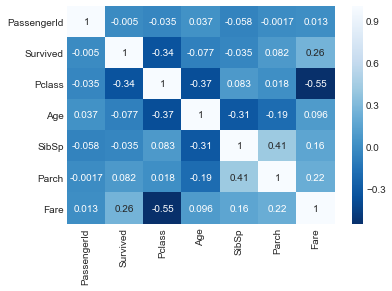

In [30]:

corr = original_train.corr()
sns.heatmap(corr, cmap="Blues_r",annot=True, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

After some experimentation, Pclass and Parch are highly correlated with Age and not each other; we use them to impute the missing ages. SibSp was also a good candidate, but including them as another subgroup creates groups made of entirely NaN ages, which we cannot take the mean of. Therefore, let us impute as follows:
* Group all observations by Pclass and Parch (that is, 3 * 7 possible groups for the 851 observations to be in).
* Find the mean age of each of the groups. This mean calculation ignores all missing values of Age.
* Replace all missing values with the mean of that observation's group.

Note this all happens in the first line of code.

Empty DataFrame
Columns: [Survived, Pclass, Age, SibSp, Parch, Fare, embark_C, embark_Q, embark_S, cabin_A, cabin_B, cabin_C, cabin_D, cabin_E, cabin_F, cabin_G, cabin_T, g_female, g_male]
Index: []
Empty DataFrame
Columns: [PassengerId, Pclass, Age, SibSp, Parch, Fare, embark_C, embark_Q, embark_S, cabin_A, cabin_B, cabin_C, cabin_D, cabin_E, cabin_F, cabin_G, g_female, g_male, cabin_T]
Index: []


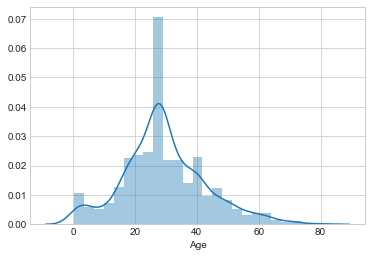

In [31]:

data_train["Age"] = data_train["Age"].fillna(data_train.groupby(["Pclass","Parch"])["Age"].transform("mean")) 
data_test["Age"] = data_test["Age"].fillna(data_train.groupby(["Pclass","Parch"])["Age"].transform("mean")) 
    # Note - test set imputed FROM TRAINING set

sns.distplot(data_train.Age);

#Check: no records exist where Age = NaN
print(data_train[data_train["Age"].isnull()])
print(data_test[data_test["Age"].isnull()])


# Binning

Let's consider the effect of binning 'Age' and 'Fare' into fewer categories.

[Future project to analyze what the best bins are, and if it's even effective]

In [32]:
# data_train["Age"] = original_train["Age"]
# data_train["Fare"] = original_train["Fare"]

age_describe =  original_train["Age"].describe()
agebins = (0, age_describe[4], age_describe[5], age_describe[6], age_describe[7])

group_names = ["Child", "Young Adult", "Adult", "Senior"]
data_train["Age"] = pd.cut(data_train["Age"], agebins, labels=group_names)
data_test["Age"] = pd.cut(data_test["Age"], agebins, labels=group_names) # Note - test set imputed FROM TRAINING set
print(data_train["Age"].value_counts())
print(data_test["Age"].value_counts())

fare_describe =  original_train["Fare"].describe()
farebins = (0, fare_describe[4], fare_describe[5], fare_describe[6], fare_describe[7])

group_names = ["Budget", "Cheap", "Regular", "Expensive"]
data_train["Fare"]  = pd.cut(data_train["Fare"], farebins, labels=group_names)
data_test["Fare"]  = pd.cut(data_test["Fare"], farebins, labels=group_names)
print(data_train["Fare"].value_counts())
print(data_test["Fare"].value_counts()) # Note - test set imputed FROM TRAINING set



Young Adult    300
Senior         207
Child          198
Adult          186
Name: Age, dtype: int64
Young Adult    151
Senior         104
Adult           85
Child           78
Name: Age, dtype: int64
Cheap        224
Expensive    222
Regular      222
Budget       208
Name: Fare, dtype: int64
Budget       112
Expensive    108
Regular       99
Cheap         96
Name: Fare, dtype: int64


In [33]:
data_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,embark_C,embark_Q,embark_S,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T,g_female,g_male
0,0,3,Young Adult,1,0,Budget,0,0,1,0,0,0,0,0,0,0,0,0,1
1,1,1,Adult,1,0,Expensive,1,0,0,0,0,1,0,0,0,0,0,1,0
2,1,3,Young Adult,0,0,Cheap,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,1,Adult,1,0,Expensive,0,0,1,0,0,1,0,0,0,0,0,1,0
4,0,3,Adult,0,0,Cheap,0,0,1,0,0,0,0,0,0,0,0,0,1


In [34]:
data_train = data_train.drop(columns=["Fare", "Age"])
data_test = data_test.drop(columns=["Fare", "Age"])
data_train.head()


,Survived,Pclass,SibSp,Parch,embark_C,embark_Q,embark_S,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T,g_female,g_male
0,0,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
2,1,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0
4,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


<font size=6>**Data Mangling to Get a Classifer Out the Door** </font>

In [35]:
X_train = data_train.drop("Survived", axis=1)
Y_train = data_train["Survived"]
X_test  = data_test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape
X_test.shape


(418, 16)

In [36]:
# Y_train.describe()
# X_train.describe()
X_test.describe()

,Pclass,SibSp,Parch,embark_C,embark_Q,embark_S,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,g_female,g_male,cabin_T
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.0
mean,2.265550,0.447368,0.392344,0.244019,0.110048,0.645933,0.016746,0.043062,0.083732,0.031100,0.021531,0.019139,0.002392,0.363636,0.636364,0.0
std,0.841838,0.896760,0.981429,0.430019,0.313324,0.478803,0.128474,0.203240,0.277317,0.173797,0.145320,0.137177,0.048912,0.481622,0.481622,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
75%,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0
max,3.000000,8.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [37]:
# Random Forest
# https://www.kaggle.com/startupsci/titanic-data-science-solutions


random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest


85.75

wait that's actually decent even though it's training data

 <font size=6>**Getting a Submission Out the Door** </font>

In [42]:

submission = pd.DataFrame({
        "PassengerId": original_test["PassengerId"],
        "Survived": Y_pred
    })
submission.head()
# submission.to_csv('../output/submission.csv', index=False)
submission.to_csv('submission24Apr2018.csv', index = False)


In [45]:

original_gendersubmission =  pd.read_csv('input/gender_submission.csv')
original_gendersubmission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
